Single Model Evaluation
-----------------------
This code will be used only to evaluate 1 model as it is specified so I can see how it is performing before I go into depth on the other models.

The table of contents is as follows:
1. [Loading Data](#Loading-Data)
2. [Mean Absolute Error](#Mean-Absolute-Error)
3. [Root Mean Squared Error](#Root-Mean-Squared-Error)
4. [KGE](#KGE)

In [1]:
MODELNUM = 2

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
---------------

In [3]:
df = pd.read_csv(f'../Models/Model_{MODELNUM}/Model_{MODELNUM}_TestData.csv')
df.head()

,Lat,Lon,Alt,Temp,Precip,Year,JulianDay_Sin,O18 A,H2 A,O18 P,H2 P
0,0.269261,0.639181,0.033353,0.839158,0.213465,0.918033,0.648358,-8.200,-58.0,-7.682361,-54.428501
1,0.887317,1.000000,0.002978,0.685257,0.049754,0.704918,0.384846,-12.637,-99.6,-15.029024,-117.490967
2,0.315448,0.330225,0.005658,0.814707,0.050903,0.032787,0.020637,-3.400,-29.2,-6.631472,-45.789433
3,0.120873,0.955797,0.051519,0.854439,0.078818,0.459016,0.648358,-2.590,-14.8,-2.761365,-9.982388
4,0.269261,0.639181,0.033353,0.564669,0.099836,0.983607,0.978122,-10.559,-71.0,-12.830439,-97.014717


# Mean Absolute Error
---------------------
The mean absolute error is the average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions are. I will be calculating the mean absolute error for the model. Then I will graph it to see how it is performing.

In [4]:
mae_O18 = mean_absolute_error(df['O18 A'], df['O18 P'])
mae_H2 = mean_absolute_error(df['H2 A'], df['H2 P'])
mae_O18, mae_H2

(np.float64(1.8444996543149472), np.float64(13.958908480651754))

# Root Mean Squared Error
-------------------------
The root mean squared error is the square root of the average of the squared differences between the predicted and actual values. It gives an idea of how far off the predictions are. I will be calculating the root mean squared error for the model. Then I will graph it to see how it is performing.

In [5]:
rmse_O18 = np.sqrt(mean_squared_error(df['O18 A'], df['O18 P']))
rmse_H2 = np.sqrt(mean_squared_error(df['H2 A'], df['H2 P']))
rmse_O18, rmse_H2

(np.float64(2.507800015589348), np.float64(18.981385529742184))

# KGE
-----
The Kling-Gupta Efficiency is a metric that compares the model's performance to a perfect model. It is a measure of how well the model is performing. I will be calculating the KGE for the model.

In [6]:
def kling_gupta_eff(actual, pred):
    # Calculate the base values needed for the calculation
    mean_act = np.mean(actual)
    mean_pred = np.mean(pred)
    sd_act = np.std(actual)
    sd_pred = np.std(pred)

    r = np.corrcoef(actual, pred)[0, 1]
    beta = mean_pred / mean_act
    alpha = sd_pred / sd_act

    return 1 - np.sqrt((r - 1) ** 2 + (beta - 1) ** 2 + (alpha - 1) ** 2)

In [7]:
kge_O18 = kling_gupta_eff(df['O18 A'], df['O18 P'])
kge_H2 = kling_gupta_eff(df['H2 A'], df['H2 P'])
kge_O18, kge_H2

(np.float64(0.8316086519360816), np.float64(0.8535980337556245))

# Comparison between predicted and actual values
------------------------------------------------
This will graph predicted values against actual values to see how well the model is performing for both O18 and H2.

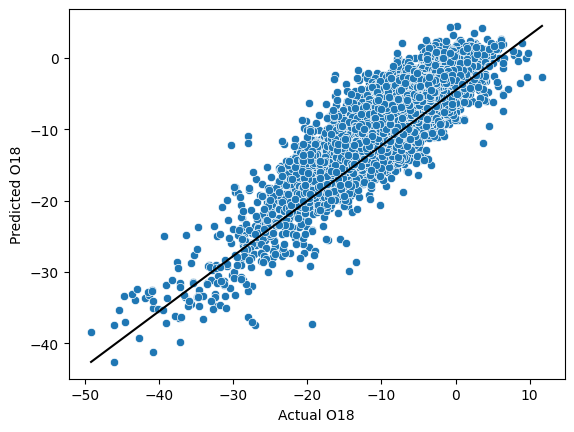

In [8]:
sns.scatterplot(x='O18 A', y='O18 P', data=df)
sns.lineplot(x=[df['O18 A'].min(), df['O18 A'].max()], y=[df['O18 P'].min(), df['O18 P'].max()], color='black')
plt.xlabel('Actual O18')
plt.ylabel('Predicted O18')
plt.show()

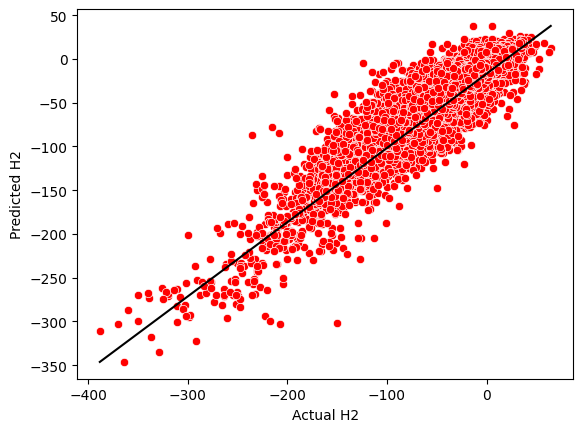

In [9]:
sns.scatterplot(x='H2 A', y='H2 P', data=df, color='red')
sns.lineplot(x=[df['H2 A'].min(), df['H2 A'].max()], y=[df['H2 P'].min(), df['H2 P'].max()], color='black')
plt.xlabel('Actual H2')
plt.ylabel('Predicted H2')
plt.show()